<br>
<font size='8'><center>Visualizzazione scientifica</center></font>
<br> <font size='6'><center> Breast Cancer Winsconsin Dataset</center></font>

<font size=3>Ci stiamo occupando del dataset <i>"Breast Cancer Winsconsin"</i> preso da Sklearn. 
    <br>L'obiettivo è quello di visualizzare i dati contenuti in questo dataset per mettere in risalto eventuali correlazioni tra alcune variabili e l'insorgenza di tumore benigno o maligno.</font>

In [36]:
#importazione delle librerie e del dataset
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px
import seaborn as sns
#questa funzione consente di rendere il bunch di dati in forma di dataframe, utilizzabile con le 
#librerie di Pandas e Matplotlib
dataset, target = load_breast_cancer(return_X_y=True, as_frame=True)
type(dataset)

pandas.core.frame.DataFrame

<font size=3>Visualizzazione del DataFrame così com'è senza alcuna modifica</font>


In [37]:
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<font size=4>Tutti i dati presenti nel dataset sono riguardanti cellule tumorali, la differenza è tra<font color='green'> tumore benigno</font> e <font color='red'>tumore maligno. </font>
    <br>Decidiamo di inserire nel DataFrame un nuovo attributo booleano chiamato <b>Type</b> che identifica con 0 il tumore maligno, con 1 quello benigno. 
    <br><b>Type:</b> 1 tumore benigno, 0 tumore maligno</font>

In [38]:
t=list(target)
dataset.insert(0,'Type', t)

In [39]:
dataset

,Type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<font size='4'>A questo punto possiamo fare il primo plot dei dati in un parallel plot. Importiamo matplotlib.pyplot.</font>

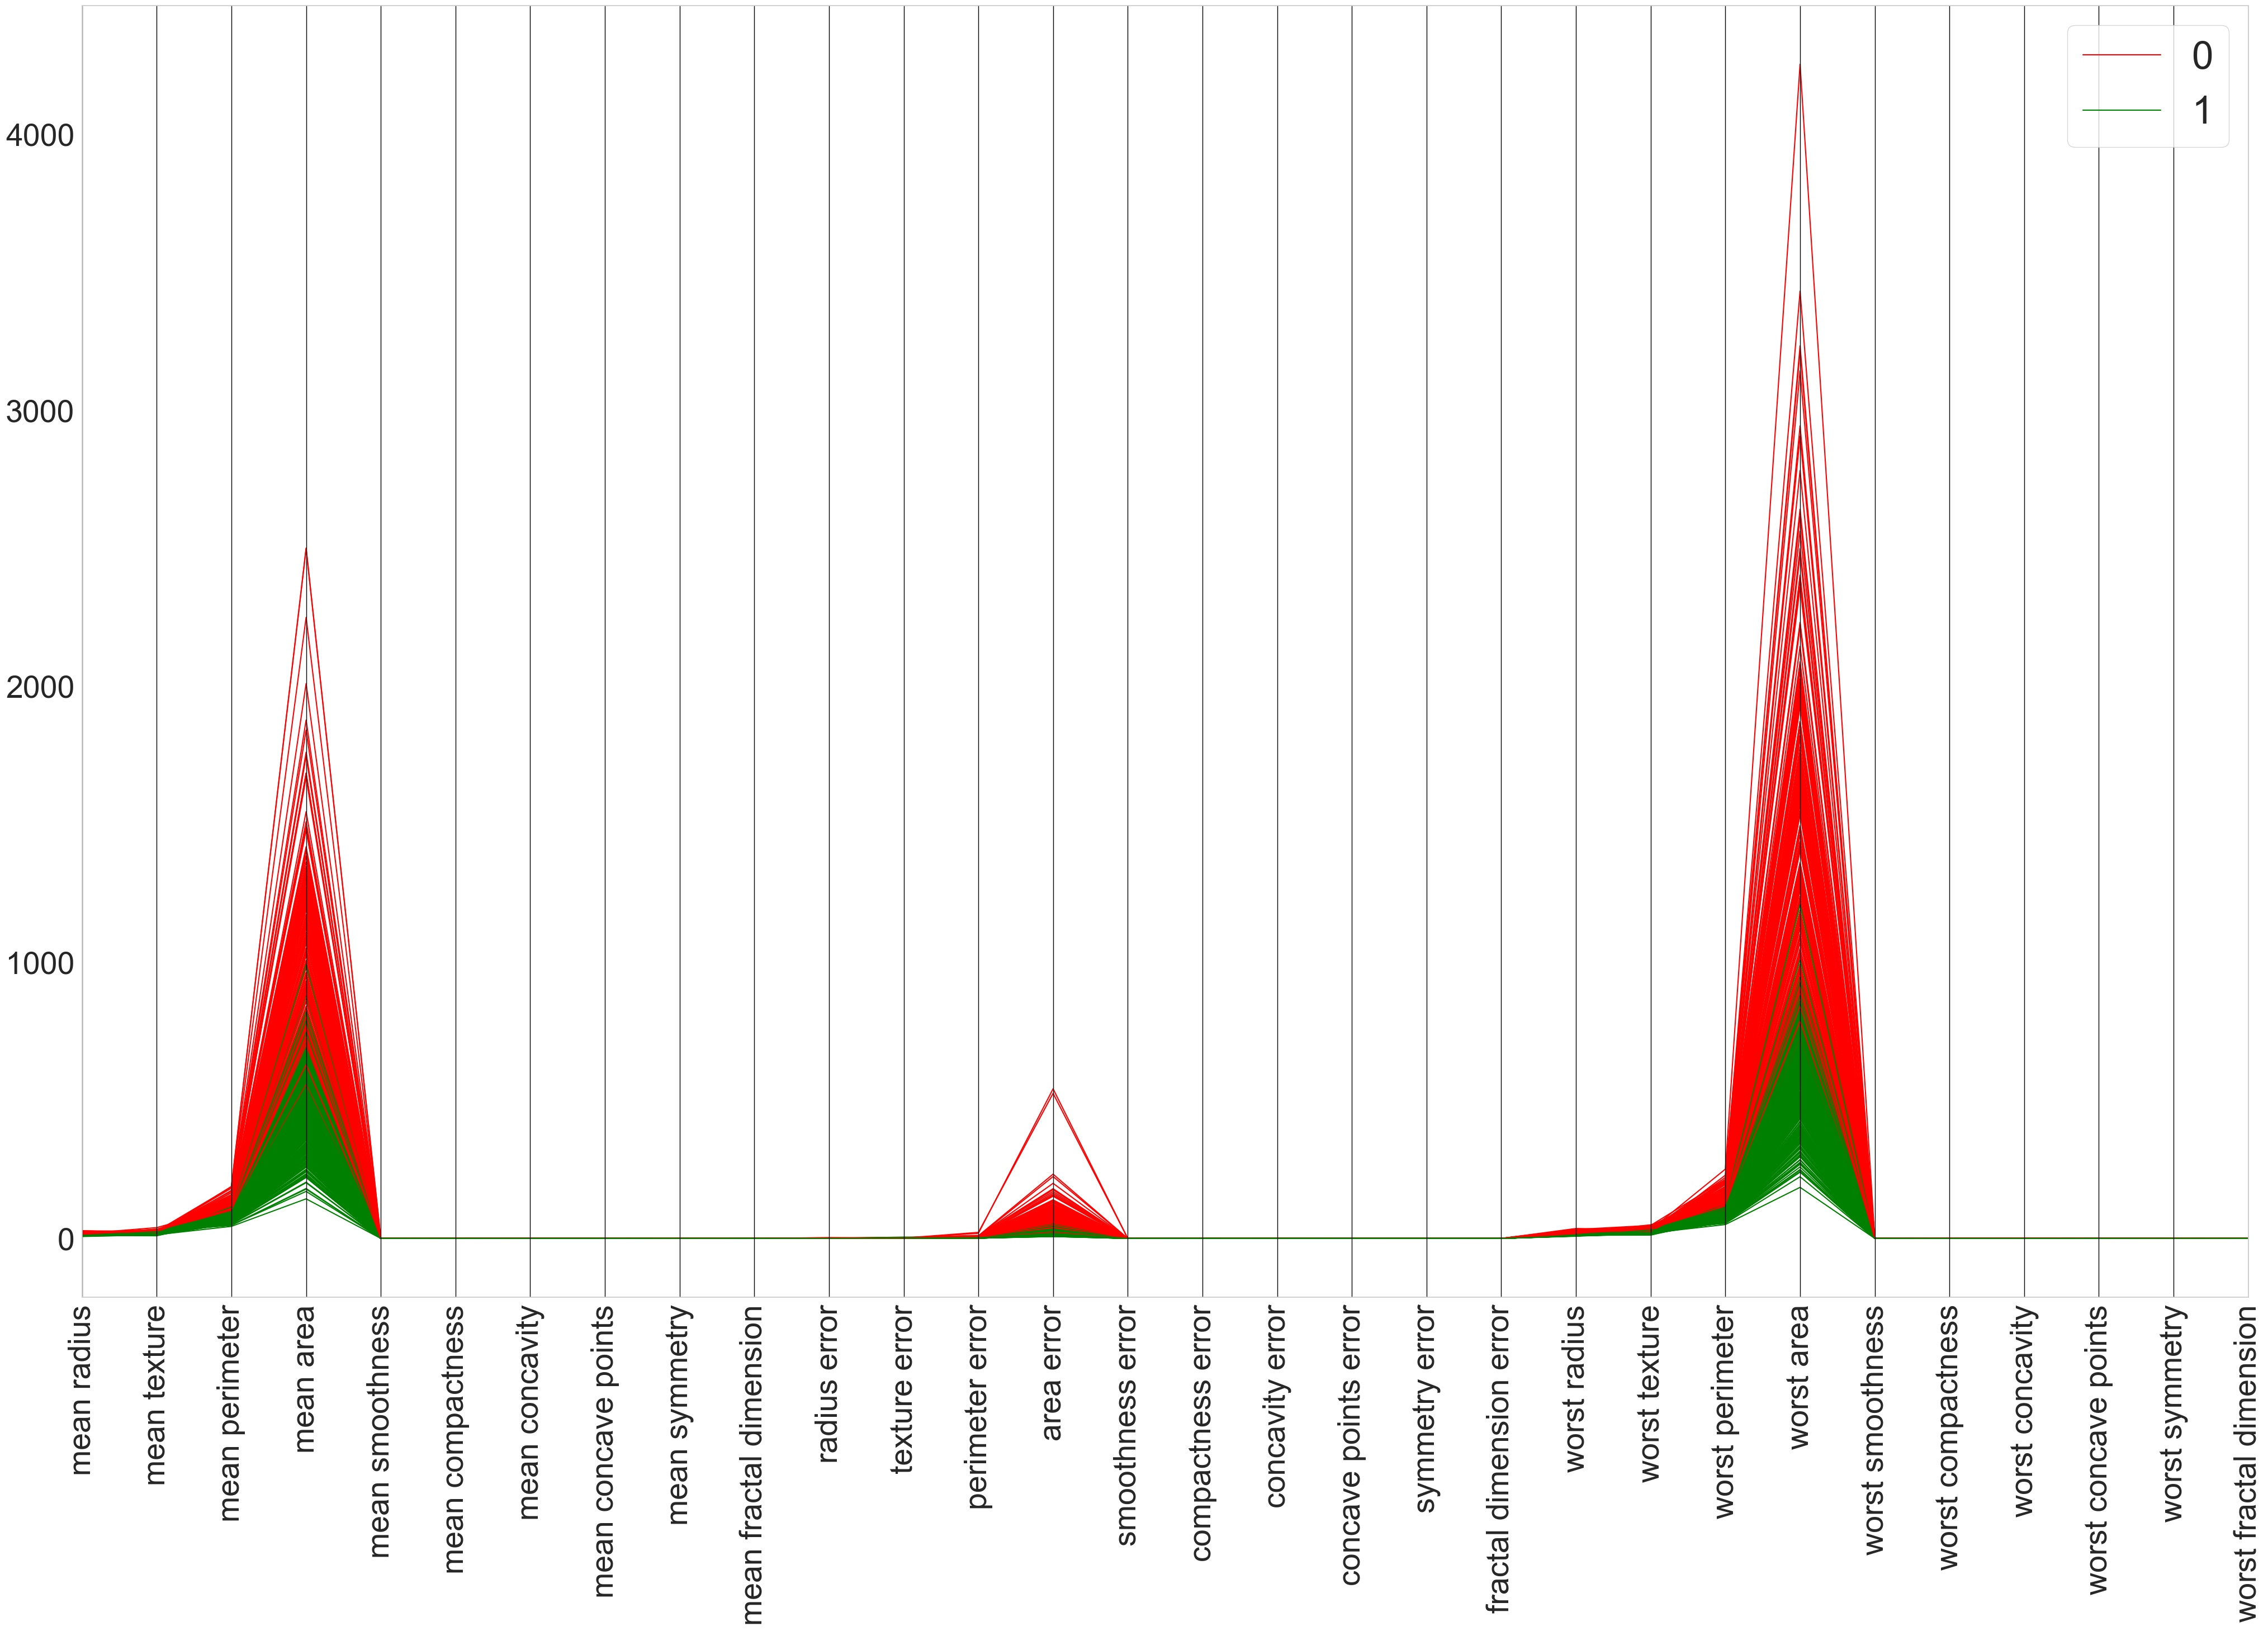

In [40]:
import matplotlib.pyplot as plt
pd.plotting.parallel_coordinates(dataset, 'Type', 
                                 color=['red', 'green'],
                                )
plt.rc('figure', figsize=(50.0, 30.0))
#ax.set_xticklabels (xlabels, fontsize =50) 
plt.xticks(rotation=90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(fontsize=50)
plt.show()

<font size='4' font color='Red'>OSSERVAZIONE:</font> <font size='4'>attorno alle variabili <i><b>mean area, area error e worst area </b></i>ci sono dei picchi rilevanti e una quasi netta distinzione tra tumori benigni e maligni. A primo impatto le altre variabili sembrano irrilevanti. Lo sono? </font>

In [41]:
#fig = px.parallel_coordinates(dataset, color='Type', #labels={"mean radius": "meanRad"}, 
 #                             dimensions=['mean radius','mean area','mean smoothness','worst texture', 'worst symmetry'])
#fig.show()

<font size='3'>Riduciamo il dataset alle sole variabili mean. </font>

In [42]:
id = list(dataset.index)
data_mean = dataset.iloc[id, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
data_mean

,Type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


<font size='3'> Entriamo nel dettaglio delle variabili che risultano essere più significative </font>

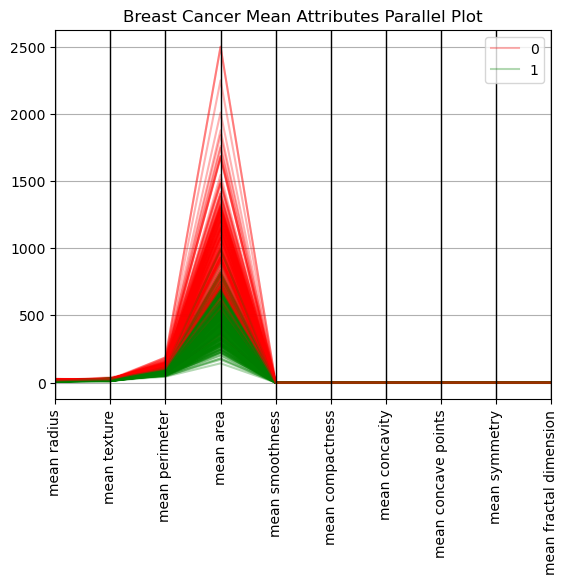

In [43]:
plt.style.use('default')
parallel_coordinates(data_mean, 'Type',
                     color=['red', 'green'],
                     alpha=0.3,)

plt.xticks(rotation=90)
plt.rc('figure', figsize=(10.0, 5.0))
plt.title("Breast Cancer Mean Attributes Parallel Plot")
plt.show()

<font size='3'> Dal parallel plot risultano molto significative le variabili mean area e mean perimeter, le altre sembrerebbero insignificanti, lo sono? Entriamo nel dettaglio</font>

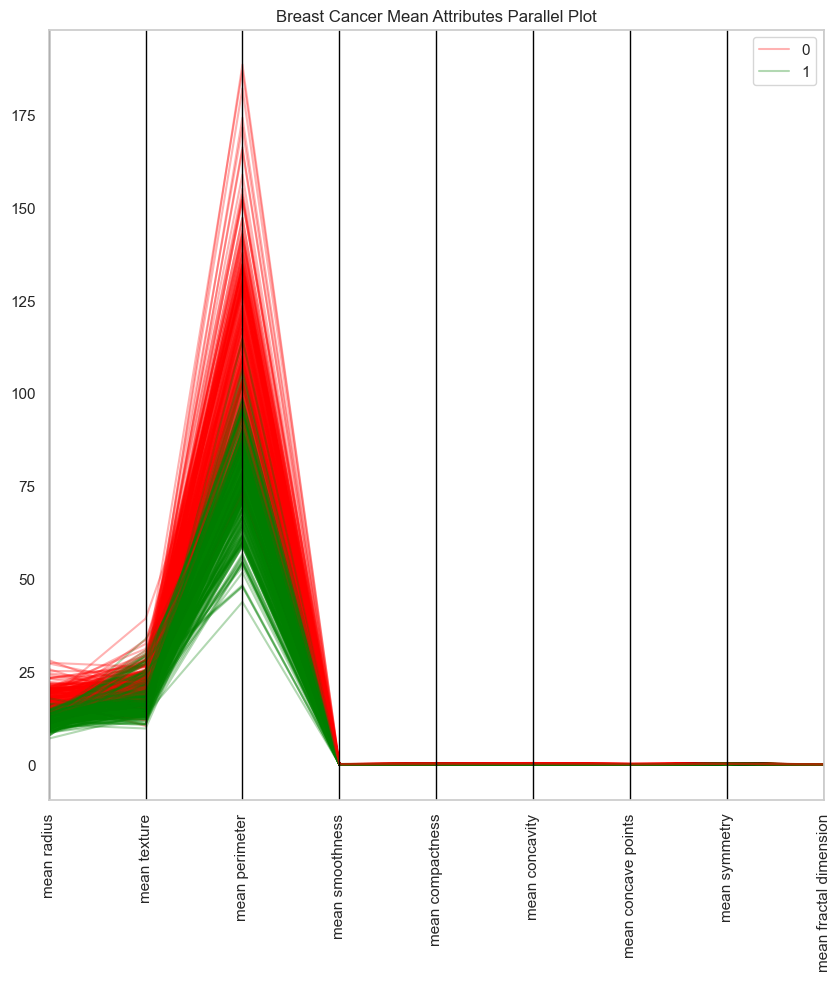

In [52]:
focus1 = data_mean.drop(['mean area'], axis = 1)
parallel_coordinates(focus1, 'Type',
                     color=['red', 'green'],
                     alpha=0.3)

plt.xticks(rotation=90)

plt.title("Breast Cancer Mean Attributes Parallel Plot")
plt.show()

<font size='3'> Focus 2 sulle variabili che sembrano ininfluenti </font>

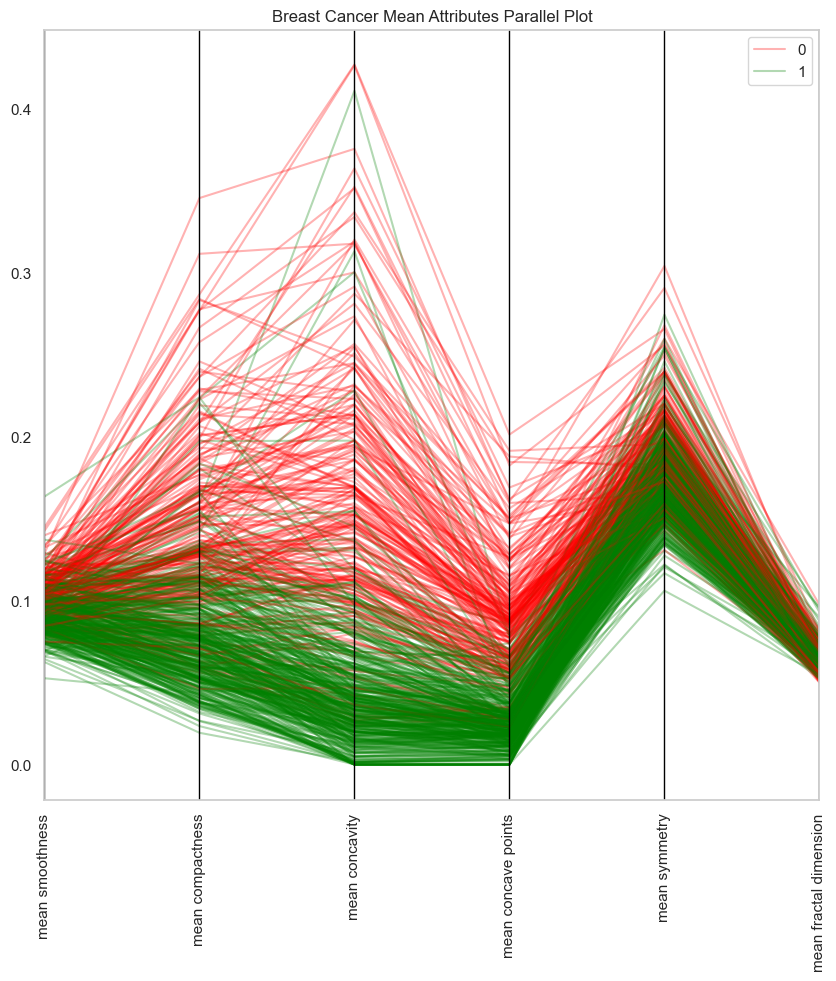

In [51]:
focus2 = focus1.drop(['mean radius', 'mean texture', 'mean perimeter'], axis = 1)
parallel_coordinates(focus2, 'Type',
                     color=['red', 'green'],
                     alpha=0.3)

plt.xticks(rotation=90)

plt.title("Breast Cancer Mean Attributes Parallel Plot")
plt.show()

OSSERVAZIONE: i valori sono molto sovrapposti, pertanto non si possono trarre conclusioni. L'unico dato rilevante è mean concave points che mostra una separazione quasi netta tra benigno e maligno.

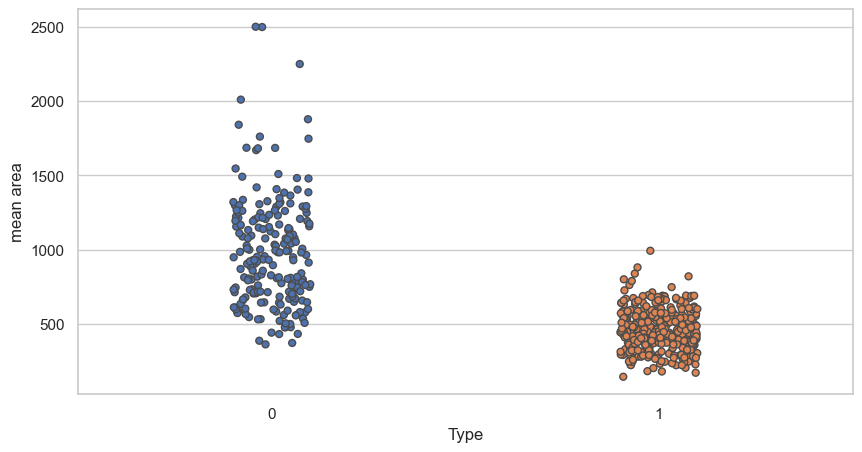

In [46]:
sns.set_theme(style="whitegrid")
sns.stripplot(x='Type', y='mean area', data=dataset, linewidth=1)
plt.rc('figure', figsize=(10.0, 10.0))

OSSERVAZIONE: plottando la variabile mean area si nota che tutti i valori con una mean area>1000 sono tumori maligni.

CORRELAZIONE TRA ATTRIBUTI DEL DATASET MEAN
<br>usiamo una matrice di correlazione, colore più scuro indica più correlazione rispetto ad un colore più chiaro.

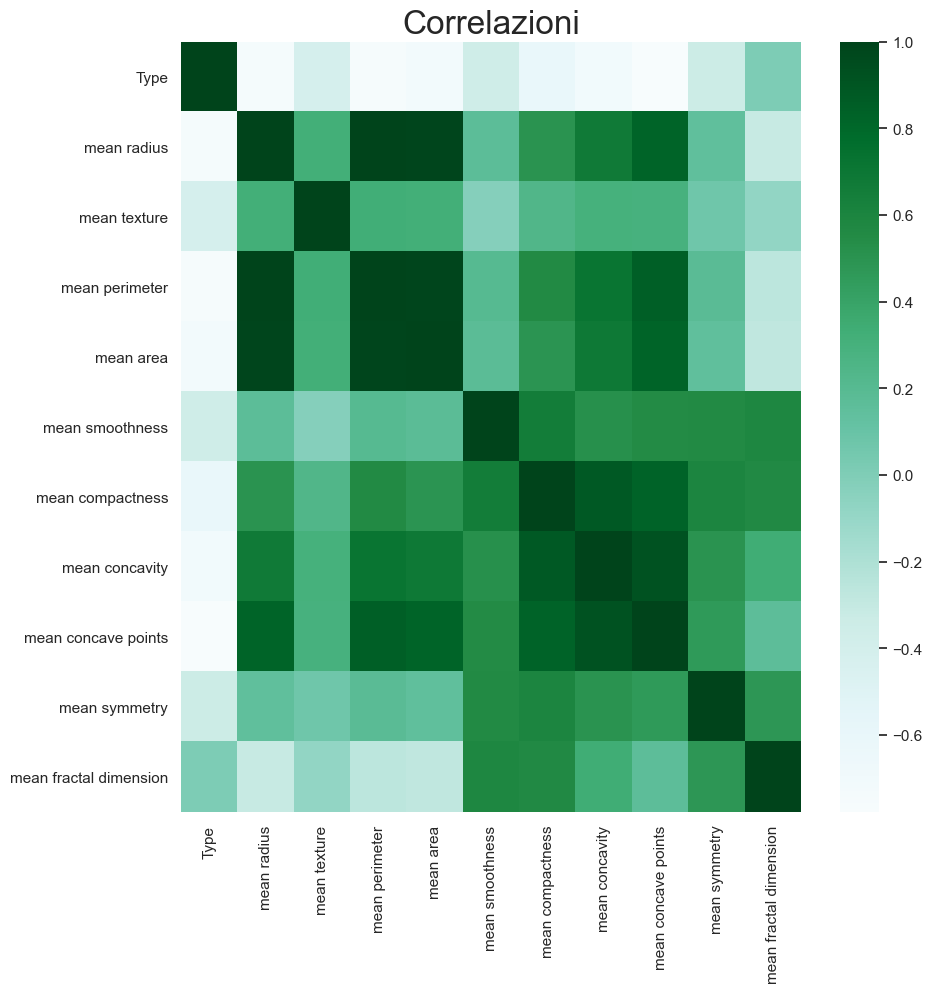

In [53]:
sns.heatmap(data_mean.corr(), cmap='BuGn').set_title("Correlazioni", size= 24)

sns.set(rc={'figure.figsize':(5,5)})

Costruiamo uno small multiple costituito da scatter plot che mettono a confronto gli attributi che risultano più correlati.

In [64]:
def pltcolor(classe):
    cols=[]
    for c in classe:
        if c==0:
            cols.append('red')  #fe9fbd
        else:
            cols.append('green') #c5ccf5
    return cols


#creo la lista dei colori con la funzione sopra
cols=pltcolor(list(target))

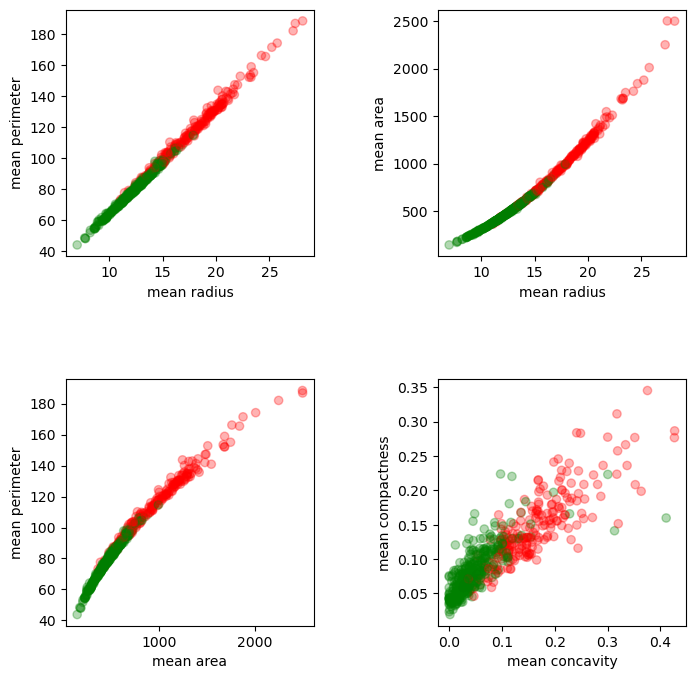

In [69]:
plt.style.use('default')
fig , axs = plt.subplots( nrows=2, ncols=2, figsize= (8,8))

axs[0,0].scatter("mean radius", "mean perimeter", data=data_mean, c=cols, alpha=0.3)
axs[0,0].set_xlabel('mean radius')
axs[0,0].set_ylabel('mean perimeter')

axs[0,1].scatter("mean radius", "mean area", data=data_mean, c=cols, alpha=0.3)
axs[0,1].set_xlabel('mean radius')
axs[0,1].set_ylabel('mean area')

axs[1,0].scatter("mean area", "mean perimeter", data=data_mean, c=cols, alpha=0.3)
axs[1,0].set_xlabel('mean area')
axs[1,0].set_ylabel('mean perimeter')

axs[1,1].scatter("mean concavity", "mean compactness", data=data_mean, c=cols, alpha=0.3)
axs[1,1].set_xlabel('mean concavity')
axs[1,1].set_ylabel('mean compactness')

fig.subplots_adjust(wspace=0.5, hspace=0.5)

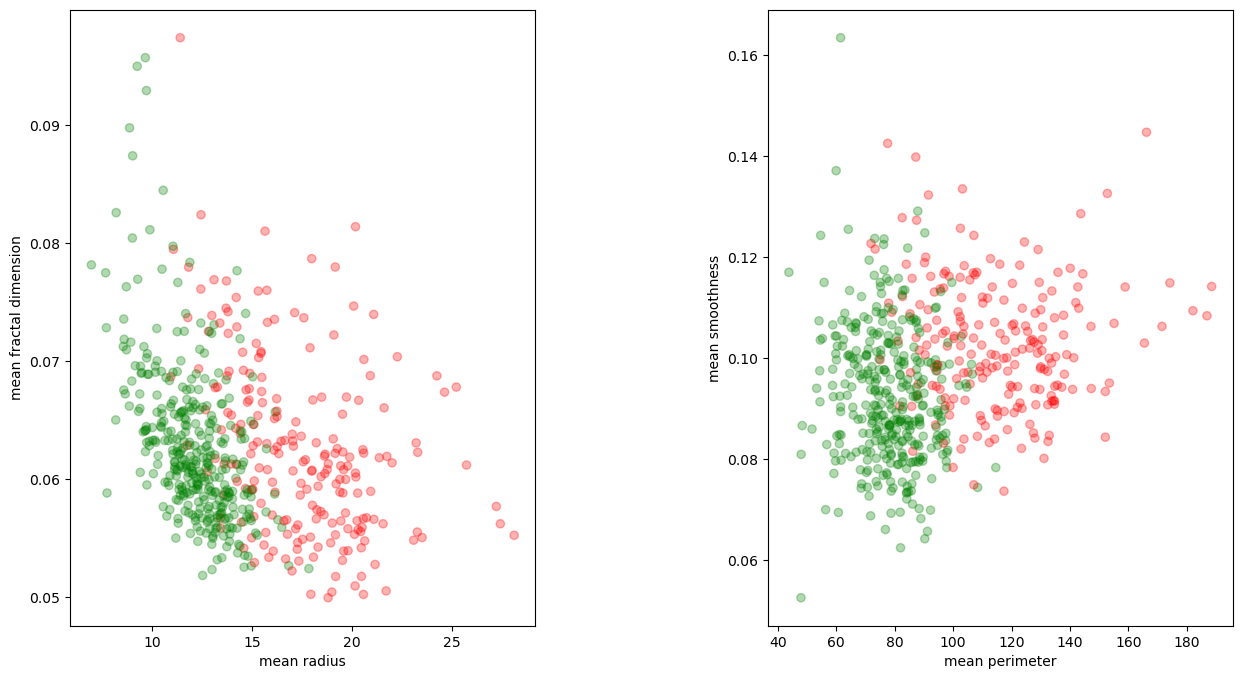

In [78]:
plt.style.use('default')
fig , axs = plt.subplots( nrows=1, ncols=2, figsize= (15,8))

axs[0].scatter("mean radius", "mean fractal dimension", data=data_mean, c=cols, alpha=0.3)
axs[0].set_xlabel('mean radius')
axs[0].set_ylabel('mean fractal dimension')

axs[1].scatter("mean perimeter", "mean smoothness", data=data_mean, c=cols, alpha=0.3)
axs[1].set_xlabel('mean perimeter')
axs[1].set_ylabel('mean smoothness')


fig.subplots_adjust(wspace=0.5, hspace=0.5)